In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import KFold, LearningCurveDisplay, learning_curve, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix

In [2]:
train = pd.read_csv('weekly_train.csv')
test = pd.read_csv('weekly_test.csv')
val = pd.read_csv('weekly_val.csv')

In [3]:
train = train.drop('Unnamed: 0', axis=1)
test = test.drop('Unnamed: 0', axis=1)
val = val.drop('Unnamed: 0', axis=1)
train = train.drop('date', axis=1)
test = test.drop('date', axis=1)
val = val.drop('date', axis=1)

In [4]:
# xtrain ytrain with each of them, drop the date and unlabeled column     
ytrain = train['score']
Xtrain = train[train.columns[:-1]]

ytest = test['score']
Xtest = test[test.columns[:-1]]

yval = val['score']
Xval = val[val.columns[:-1]]

In [5]:
# dt, not alot of params due to time it takes to train.
dt_params = {'max_depth':[10,50,100,500], 'class_weight':('balanced', None)}
dt = DecisionTreeClassifier()

In [6]:
%%time
dt_clf = GridSearchCV(dt, dt_params, cv=5)
dt_clf.fit(Xtrain,ytrain)
dt_clf.best_estimator_

CPU times: user 1h 26min 35s, sys: 50 s, total: 1h 27min 25s
Wall time: 1h 27min 37s


DecisionTreeClassifier(max_depth=10)

In [7]:
max_depth = 10
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=10)

In [8]:
dt_ypred = dt.predict(Xtest)

# accuracy_score, f1_score, precision_score, recall_score, roc_curve score

print('accuracy score: ',accuracy_score(ytest,dt_ypred))
print('f1 score: ', f1_score(ytest,dt_ypred,average='weighted'))
print('precision score: ', precision_score(ytest,dt_ypred,average='weighted'))
print('recall score: ', recall_score(ytest,dt_ypred,average='weighted'))
print('roc curve score: ', recall_score(ytest,dt_ypred,average='weighted'))

accuracy score:  0.7471073408573409
f1 score:  0.6697385078378932
precision score:  0.6409781894814641
recall score:  0.7471073408573409
roc curve score:  0.7471073408573409


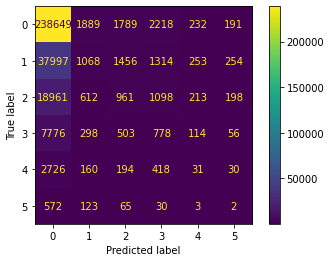

In [9]:
# confusion matrix 
cm = confusion_matrix(ytest, dt_ypred)
disp = ConfusionMatrixDisplay(cm, display_labels=[0,1,2,3,4,5])
disp.plot()

In [10]:
text_representation = export_text(dt, feature_names=list(Xtrain.columns))
print(text_representation)

|--- T2M_RANGE <= 89.98
|   |--- lon <= -96.90
|   |   |--- T2MDEW <= -1.78
|   |   |   |--- elevation <= 774.00
|   |   |   |   |--- lat <= 41.57
|   |   |   |   |   |--- T2M_MIN <= 0.41
|   |   |   |   |   |   |--- QV2M <= 16.19
|   |   |   |   |   |   |   |--- TS <= -22.31
|   |   |   |   |   |   |   |   |--- WS50M_MAX <= 81.31
|   |   |   |   |   |   |   |   |   |--- WS10M_MAX <= 38.71
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- WS10M_MAX >  38.71
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- WS50M_MAX >  81.31
|   |   |   |   |   |   |   |   |   |--- T2M_RANGE <= 67.38
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- T2M_RANGE >  67.38
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- TS >  -22.31
|   |   |   |   |   |   |   |   |--- lat <= 38.19
|   |   |   |   |   |   |   |   |   |--- T2M_RANGE <= 56.73

In [ ]:
# as seen the data is heavy for class 0 so the confusion makes that prediction the most. I 
# am going to make it a binary classification and see if I get better results

In [11]:
train['score'] = train['score'].replace([2,3,4,5],1)
test['score'] = test['score'].replace([2,3,4,5],1)
train['score'].value_counts()

0    1651128
1    1102560
Name: score, dtype: int64

In [12]:
# xtrain ytrain with each of them, drop the date and unlabeled column     
ytrain = train['score']
Xtrain = train[train.columns[:-1]]

ytest = test['score']
Xtest = test[test.columns[:-1]]

yval = val['score']
Xval = val[val.columns[:-1]]

In [13]:
# dt, not alot of params due to time it takes to train.
dt_params = {'max_depth':[5,10,50], 'class_weight':('balanced', None)}
dt = DecisionTreeClassifier()

In [8]:
%%time
dt_clf = GridSearchCV(dt, dt_params, cv=5)
dt_clf.fit(Xtrain,ytrain)
dt_clf.best_estimator_

CPU times: user 44min 18s, sys: 35.7 s, total: 44min 54s
Wall time: 45min 5s


DecisionTreeClassifier(max_depth=5)

In [14]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=5)

In [15]:
dt_ypred = dt.predict(Xtest)

print('accuracy score: ',accuracy_score(ytest,dt_ypred))
print('f1 score: ', f1_score(ytest,dt_ypred,average='weighted'))
print('precision score: ', precision_score(ytest,dt_ypred,average='weighted'))
print('recall score: ', recall_score(ytest,dt_ypred,average='weighted'))
print('roc curve score: ', recall_score(ytest,dt_ypred,average='weighted'))

accuracy score:  0.7315179190179191
f1 score:  0.7385865789167345
precision score:  0.7483393189461756
recall score:  0.7315179190179191
roc curve score:  0.7315179190179191


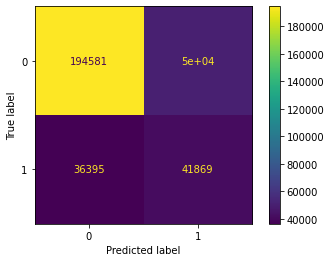

In [16]:
cm = confusion_matrix(ytest, dt_ypred)
disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
disp.plot()

In [17]:
text_representation = export_text(dt, feature_names=list(Xtrain.columns))
print(text_representation)

|--- T2M_RANGE <= 89.98
|   |--- lon <= -96.57
|   |   |--- PS <= 632.65
|   |   |   |--- lat <= 45.56
|   |   |   |   |--- lon <= -107.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- lon >  -107.95
|   |   |   |   |   |--- class: 1
|   |   |   |--- lat >  45.56
|   |   |   |   |--- lon <= -113.97
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- lon >  -113.97
|   |   |   |   |   |--- class: 1
|   |   |--- PS >  632.65
|   |   |   |--- T2MDEW <= -12.74
|   |   |   |   |--- T2M_MAX <= -2.72
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- T2M_MAX >  -2.72
|   |   |   |   |   |--- class: 1
|   |   |   |--- T2MDEW >  -12.74
|   |   |   |   |--- TS <= 209.11
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- TS >  209.11
|   |   |   |   |   |--- class: 1
|   |--- lon >  -96.57
|   |   |--- T2M_MAX <= 220.50
|   |   |   |--- lat <= 36.51
|   |   |   |   |--- T2M_RANGE <= 75.78
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- T2M_RANGE >  75.78
|   |   |   |  

In [18]:
# still not very good try a min_max scaler on it. 
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler().fit(Xtrain)
mms_data = mms.transform(Xtrain)

In [19]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(mms_data,ytrain)

DecisionTreeClassifier(max_depth=5)

In [21]:
mms_test_data = mms.transform(Xtest)

mms_dt_ypred = dt.predict(mms_test_data)

print('accuracy score: ',accuracy_score(ytest,mms_dt_ypred))
print('f1 score: ', f1_score(ytest,mms_dt_ypred,average='weighted'))
print('precision score: ', precision_score(ytest,mms_dt_ypred,average='weighted'))
print('recall score: ', recall_score(ytest,mms_dt_ypred,average='weighted'))
print('roc curve score: ', recall_score(ytest,mms_dt_ypred,average='weighted'))

accuracy score:  0.7315179190179191
f1 score:  0.7385865789167345
precision score:  0.7483393189461756
recall score:  0.7315179190179191
roc curve score:  0.7315179190179191


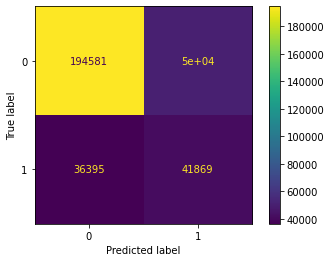

In [22]:
cm = confusion_matrix(ytest, mms_dt_ypred)
disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
disp.plot()

In [23]:
text_representation = export_text(dt, feature_names=list(Xtrain.columns))
print(text_representation)

|--- T2M_RANGE <= 0.50
|   |--- lon <= 0.49
|   |   |--- PS <= 0.65
|   |   |   |--- lat <= 0.86
|   |   |   |   |--- lon <= 0.29
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- lon >  0.29
|   |   |   |   |   |--- class: 1
|   |   |   |--- lat >  0.86
|   |   |   |   |--- lon <= 0.18
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- lon >  0.18
|   |   |   |   |   |--- class: 1
|   |   |--- PS >  0.65
|   |   |   |--- T2MDEW <= 0.49
|   |   |   |   |--- T2M_MAX <= 0.32
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- T2M_MAX >  0.32
|   |   |   |   |   |--- class: 1
|   |   |   |--- T2MDEW >  0.49
|   |   |   |   |--- TS <= 0.83
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- TS >  0.83
|   |   |   |   |   |--- class: 1
|   |--- lon >  0.49
|   |   |--- T2M_MAX <= 0.78
|   |   |   |--- lat <= 0.47
|   |   |   |   |--- T2M_RANGE <= 0.42
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- T2M_RANGE >  0.42
|   |   |   |   |   |--- class: 0
|   |   |   |--- la

In [ ]:
# no help will have to be future work. 